# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [47]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import  LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score,balanced_accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split

In [2]:
# Your code here
data = pd.read_csv('data_all.zip')

In [3]:
data.shape

(116322, 785)

In [13]:
data.head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.info

<bound method DataFrame.info of            e    1    2    3    4    5    6    7    8    9  ...  775  776  777  \
0       36.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2        3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3       33.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4       30.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
116317   7.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
116318  55.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
116319  28.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
116320   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
116321   5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0

In [5]:
data.columns

Index(['e', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '775', '776', '777', '778', '779', '780', '781', '782', '783', '784'],
      dtype='object', length=785)

In [6]:
data['5'].value_counts().sort_values()

1.0         1
0.0    116321
Name: 5, dtype: int64

In [7]:
data.isnull().sum()

e      0
1      0
2      0
3      0
4      0
      ..
780    0
781    0
782    0
783    0
784    0
Length: 785, dtype: int64

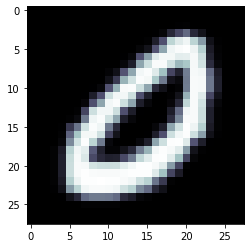

In [8]:
image = np.array(data.iloc[1,1:])
plt.imshow(image.reshape(28,28),cmap=plt.cm.bone)

In [12]:
e_values = pd.DataFrame(data.e.value_counts())
e_values['index'] = e_values.index
#e_values['index'] = e_values['index'].apply(lambda x : int(x))
e_values_sort = e_values.sort_values('index')
e_values_sort

,e,index
0.0,5778,0.0
1.0,6330,1.0
2.0,5869,2.0
3.0,5969,3.0
4.0,5619,4.0
...,...,...
57.0,468,57.0
58.0,467,58.0
59.0,470,59.0
60.0,381,60.0


In [19]:
data.e[ data.e == 36].index[0]

0

0.0


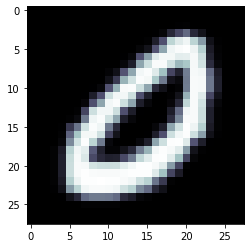

1.0


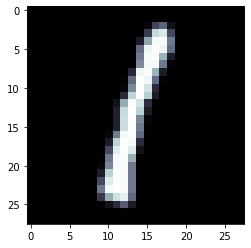

2.0


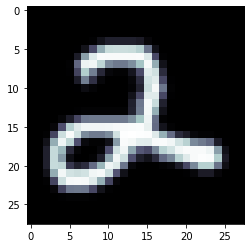

3.0


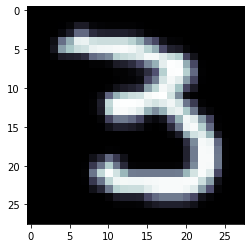

4.0


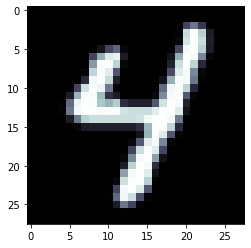

5.0


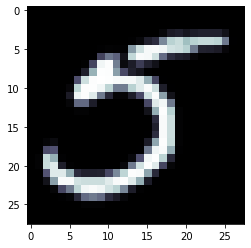

6.0


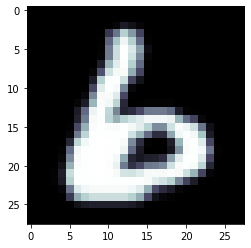

7.0


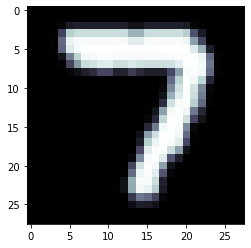

8.0


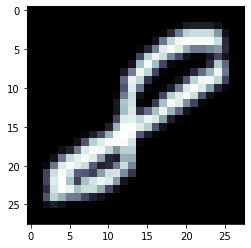

9.0


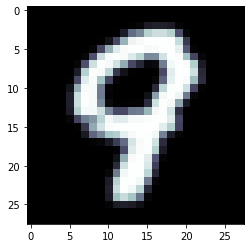

10.0


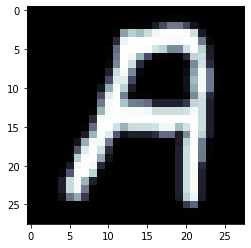

11.0


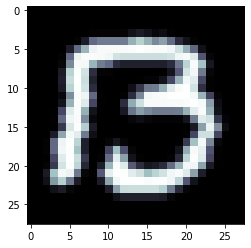

12.0


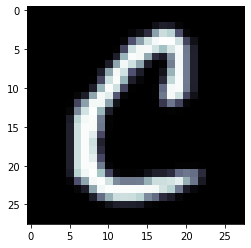

13.0


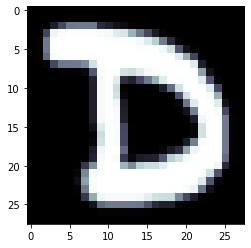

14.0


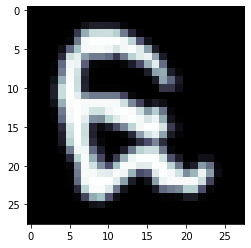

15.0


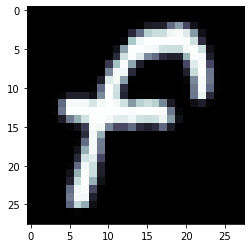

16.0


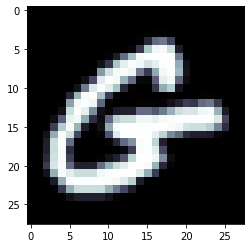

17.0


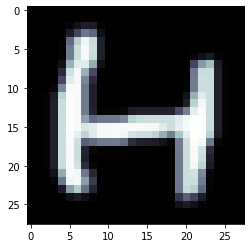

18.0


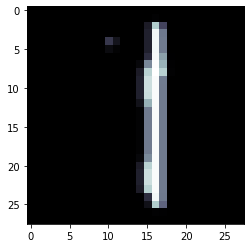

19.0


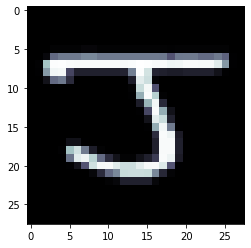

20.0


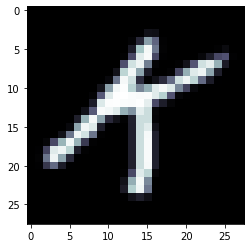

21.0


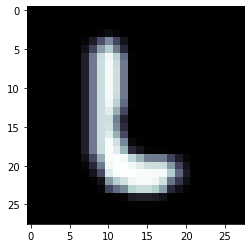

22.0


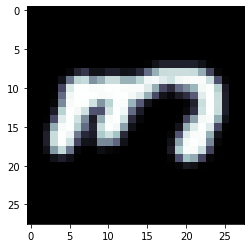

23.0


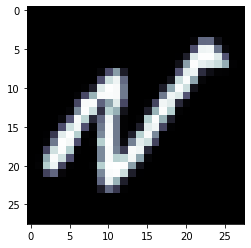

24.0


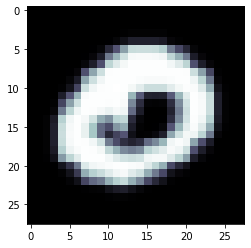

25.0


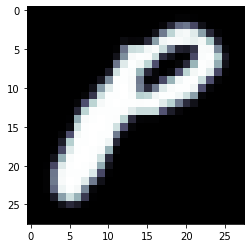

26.0


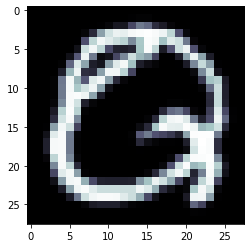

27.0


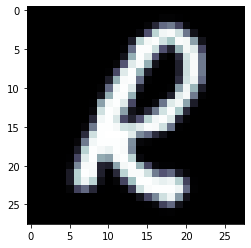

28.0


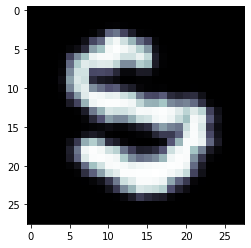

29.0


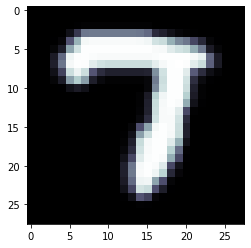

30.0


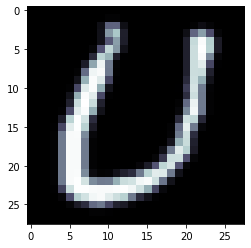

31.0


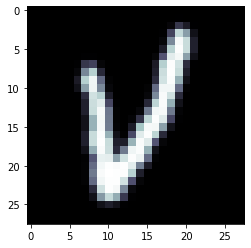

32.0


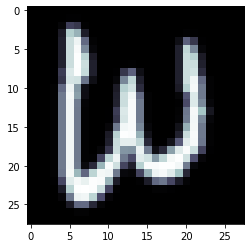

33.0


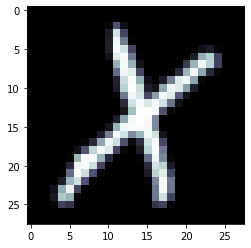

34.0


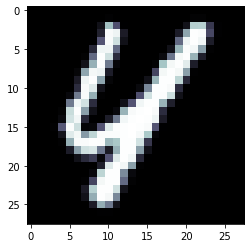

35.0


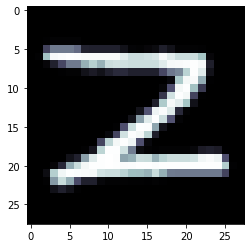

36.0


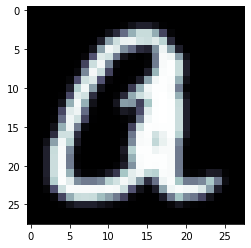

37.0


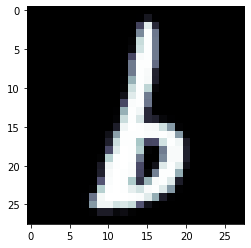

38.0


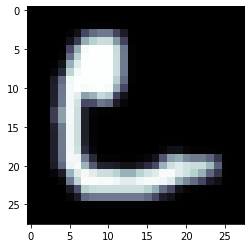

39.0


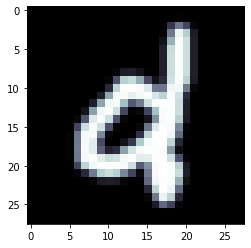

40.0


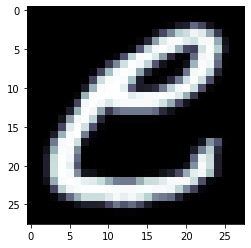

41.0


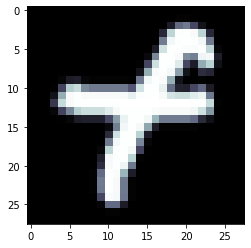

42.0


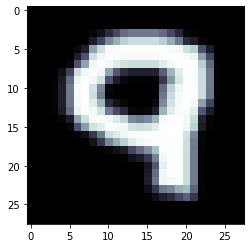

43.0


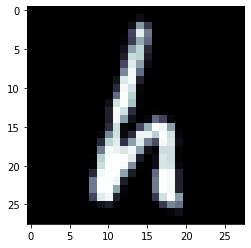

44.0


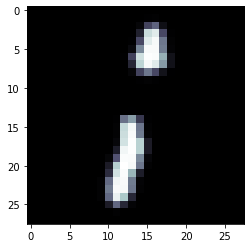

45.0


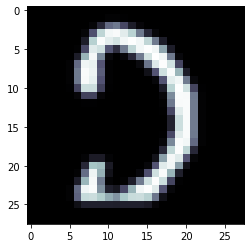

46.0


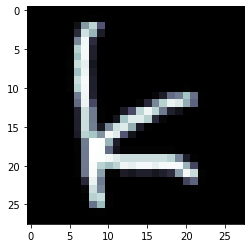

47.0


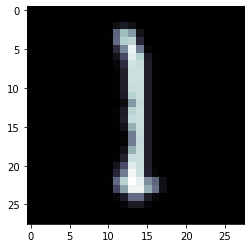

48.0


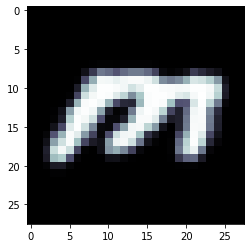

49.0


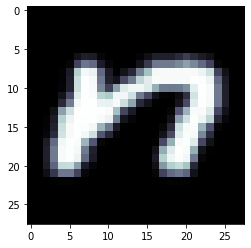

50.0


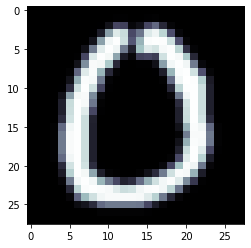

51.0


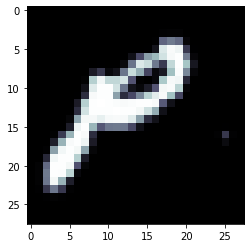

52.0


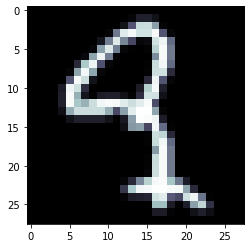

53.0


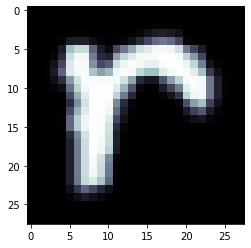

54.0


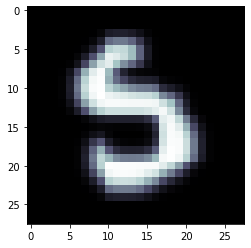

55.0


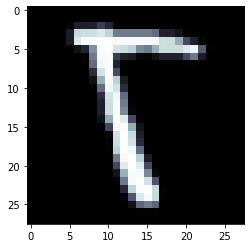

56.0


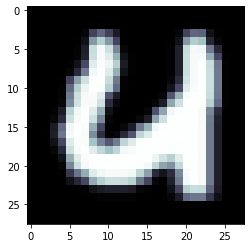

57.0


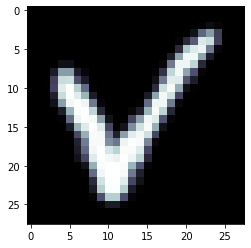

58.0


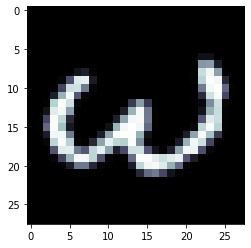

59.0


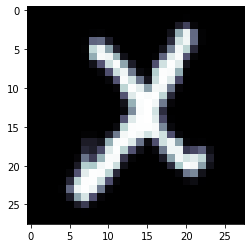

60.0


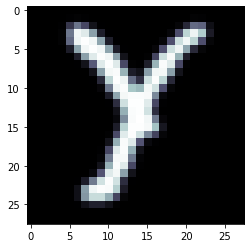

61.0


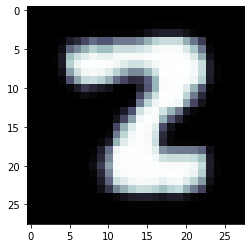

In [21]:
for x in e_values_sort['index']:  
    print(x)
    n = data.e[ data.e == int(x)].index[0]
    image = np.array(data.iloc[n,1:])
    plt.imshow(image.reshape(28,28),cmap=plt.cm.bone)
    plt.show()

In the rows of e column are numbers, it corresponds to the letter o digit in the image of that row. 
0-9 are the digits 10-35 are the upper letter A-Z and 36-61 are the lower a-z.

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [39]:
# Your code here
digitos = [float(i) for i in range(0,10)]
upper = [float(i) for i in range(10,36)]
lower = [float(i) for i in range(36,62)]

def get_type(e) :
    if e in digitos :
        return 'digit'
    elif e in upper :
        return 'upper'
    else :
        return 'lower'

data['Type'] = data['e'].apply(get_type) 
data[['e','Type']]   

,e,Type
0,36.0,lower
1,0.0,digit
2,3.0,digit
3,33.0,upper
4,30.0,upper
...,...,...
116317,7.0,digit
116318,55.0,lower
116319,28.0,upper
116320,0.0,digit


In [45]:
data_dummy = pd.get_dummies(data , columns = ['Type'], drop_first = False)
data_dummy

,e,1,2,3,4,5,6,7,8,9,...,778,779,780,781,782,783,784,Type_digit,Type_lower,Type_upper
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116317,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
116318,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
116319,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
116320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0


In [54]:
# Your code here
# Spliting the data for test and train 
x = data_dummy.drop(['e','Type_digit','Type_lower','Type_upper'],axis = 1)
y_upper = data_dummy['Type_upper']
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(x, y_lower, test_size=0.2)

### Logistic Regression Uppercases

* Try to do the same thing with lowercases.

In [55]:
# Spliting the data for test and train 
y_lower = data_dummy['Type_lower']
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(x, y_lower, test_size=0.2)

* Try to do the same thing with numbers.

In [56]:
# Your code here
y_digit = data_dummy['Type_lower']
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(x, y_digit, test_size=0.2)